# Visualize generated scenarios

(from the `/llm/generate/scenario` endpoint)

## Demonstrate a generated scenario (`curl`)

In [ ]:
# %%sh

# curl -X 'POST' \
#   'http://localhost:8001/llm/generate/scenario' \
#   -H 'accept: application/json' \
#   -H 'Content-Type: application/json' \
#   -d '{
#   "query": "A healthy patient."
# }'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100    35    0     0  100    35      0      1  0:00:35  0:00:16  0:00:01     0 15   10 0:00:04 --:--:--     8      0      6  0:00:05  0:00:05 --:--:--     6   5  0:00:07  0:00:06  0:00:01     008  0:00:07  0:00:01     0--:--:--     0     0:11  0:00:10  0:00:01     0  2  0:00:17  0:00:12  0:00:05     0 0:00:13  0:00:04     0      2  0:00:17  0:00:14  0:00:03     00:17  0:00:15  0:00:02     0:17 --:--:--     0      0      1  0:00:35  0:00:18  0:00:17     0     1  0:00:35  0:00:19  0:00:16     0    1  0:00:35  0:00:20  0:00:15     035      0      1  0:00:35  0:00:21  0:00:14     0:22  0:00:13     00      1  0:00:35  0:00:23  0:00:12     0    1  0:00:35  0:00:24  0:00:11     00:25  0:00:10     00:35  0:00:26  0:00:09     0

{"qualitative_description":"This individual maintains a very consistent and healthy lifestyle. They follow a balanced diet with regular meal times, engage in moderate physical activity daily, and prioritize getting 7-8 hours of sleep each night. Their stress levels are low, and they have a well-established routine for managing their diabetes. Their blood glucose levels are generally stable and within their target range, with predictable patterns and few unexpected fluctuations.","parameters":{"d":0,"taup":1,"taug":1,"B":0.05,"Cm":0,"toff":0},"sample_solutions":[{"t":0.0,"c":0.0830452722,"m":0.8535533906,"a":0.2507233447,"I_S":0.1529527985,"I_E":0.0383488372,"L":0.0,"g_0":0.1,"g_1":0.1,"g_2":0.1,"G":0.3,"is_meal":false},{"t":1.0434782609,"c":0.0380090513,"m":0.9358301507,"a":0.2539293579,"I_S":0.0835026721,"I_E":0.0212037799,"L":3e-08,"g_0":0.1,"g_1":0.1,"g_2":0.1,"G":0.3,"is_meal":false},{"t":2.0869565217,"c":0.0214209099,"m":0.98574969,"a":0.2627732222,"I_S":0.0388959914,"I_E":0.01022

100  5542  100  5507  100    35    208      1  0:00:35  0:00:26  0:00:09  1314


"L":0.1325418824,"g_0":0.1000482904,"g_1":0.1005590015,"g_2":0.5310349728,"G":0.7316422646,"is_meal":false},{"t":19.8260869565,"c":0.1823035565,"m":0.3300231124,"a":0.2652540915,"I_S":0.637947763,"I_E":0.1692182543,"L":0.0182225189,"g_0":0.1000297827,"g_1":0.100292864,"g_2":0.20462541,"G":0.4049480567,"is_meal":false},{"t":20.8695652174,"c":0.1327959552,"m":0.4816654608,"a":0.2524778631,"I_S":0.5022414334,"I_E":0.1268048439,"L":0.0008732045,"g_0":0.1000184894,"g_1":0.1001579958,"g_2":0.1302813849,"G":0.3304578701,"is_meal":false},{"t":21.9130434783,"c":0.0873966752,"m":0.6183609732,"a":0.2502021979,"I_S":0.3800886207,"I_E":0.0950990083,"L":1.14478e-05,"g_0":0.1000116861,"g_1":0.1000883661,"g_2":0.1103485482,"G":0.3104486004,"is_meal":false},{"t":22.9565217391,"c":0.046089926,"m":0.7450550414,"a":0.2500020598,"I_S":0.2666959268,"I_E":0.0666745311,"L":3e-08,"g_0":0.1000075448,"g_1":0.1000512318,"g_2":0.1040296155,"G":0.3040883921,"is_meal":false},{"t":24.0,"c":0.0202182535,"m":0.85355339

## Generate using the `pfun-cma-model` CLI

In [ ]:
!pfun-cma-model generate-scenario

## Load the scenario

In [3]:
import json
from pathlib import Path
import pandas as pd

response_fpath = Path('../../results/generated-responses/response_1760175858463.json')

response_json = json.loads(response_fpath.read_text())

response_json

{'qualitative_description': 'This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control. They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night. Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year. As a result, their blood glucose levels are generally stable and predictable.',
 'parameters': {'d': 0, 'taup': 1, 'taug': 1, 'B': 0.05, 'Cm': 0, 'toff': 0},
 'sample_solutions': [{'t': 0,
   'c': 0.0830452722,
   'm': 0.8535533906,
   'a': 0.2507233447,
   'I_S': 0.1529527985,
   'I_E': 0.0383488372,
   'L': 0,
   'g_0': 0.1,
   'g_1': 0.1,
   'g_2': 0.1,
   'G': 0.3,
   'is_meal': False},
  {'t': 1.0434782609,
   'c': 0.0380090513,
   'm': 0.9358301507,
   'a': 0.2539293579,
   'I_S': 0.0835026721,
   'I_E': 0.02

In [8]:
# Description

response_json["qualitative_description"]

'This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control. They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night. Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year. As a result, their blood glucose levels are generally stable and predictable.'

In [5]:
df = pd.DataFrame.from_records(response_json["sample_solutions"])

df.head()

,t,c,m,a,I_S,I_E,L,g_0,g_1,g_2,G,is_meal
0,0.000000,0.083045,0.853553,0.250723,0.152953,0.038349,0.000000e+00,0.1,0.1,0.1,0.3,False
1,1.043478,0.038009,0.935830,0.253929,0.083503,0.021204,3.000000e-08,0.1,0.1,0.1,0.3,False
2,2.086957,0.021421,0.985750,0.262773,0.038896,0.010221,1.144780e-05,0.1,0.1,0.1,0.3,False
3,3.130435,0.018138,0.997092,0.280742,0.028649,0.008043,8.732045e-04,0.1,0.1,0.1,0.3,False
4,4.173913,0.040626,0.924152,0.310228,0.094228,0.029232,1.822252e-02,0.1,0.1,0.1,0.3,False


## Visualize (simple)

### Glucose

<Axes: xlabel='t'>

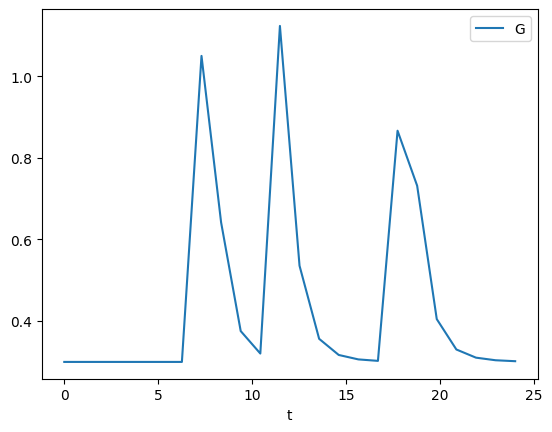

In [6]:
df.plot(x="t", y="G")

#### Endogenous currents


- **I_S** : Insulin secretion (endogenous)
- **I_E** : Effective Insulin (injected + endogenous)
- **L** : ("Light") Photoperiod conveyed via hypothalamus

<Axes: xlabel='t'>

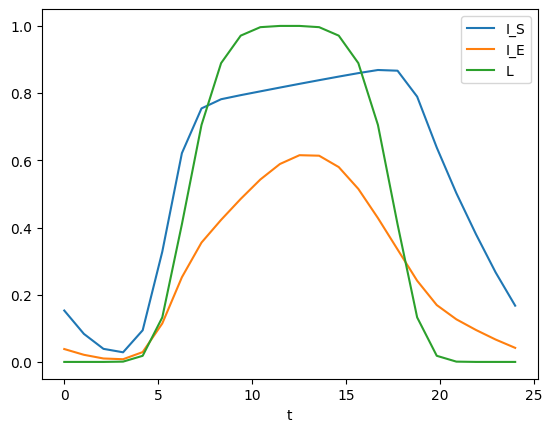

In [7]:
df.plot(x="t", y=["I_S", "I_E", "L", ])